# ** Setting Up Libraries and API keys **

In [1]:
import pandas as pd
import requests
import os
import tweepy
import numpy as np
from API_key import consumer_key, consumer_secret, access_token, access_secret
from timeit import default_timer as timer
from datetime import datetime as dt
import math 
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
%matplotlib inline  

# **Gathering**

## Getting Data Programmatically for flat files

In [2]:
urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv',
       'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

for url in urls:
    response = requests.get(url)
    full_file = os.path.join( '.', url.split('/')[-1])
    full_file = full_file.replace('-','_')
    with open(full_file, mode = 'wb') as file:
        file.write(response.content)

## Converting Flat Files to Data Frames

In [3]:
pd.set_option('display.max_colwidth', 1000)
df_archived = pd.read_csv('./twitter_archive_enhanced.csv')
df_predict =  pd.read_csv('./image_predictions.tsv',sep = '\t')

## Getting Data Using API

In [4]:
# Creating Header for text file
title_str = "{}|".format('tweet_id')
title_str = title_str + "{}|".format('retweet_count')
title_str = title_str + "{}|".format('favorite_count')
title_str = title_str + "{}".format('truncated')

with open('./tweet_json.txt','w') as f: 
    f.write(title_str) 

# Connecting to API using keys saved in another file
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# Collecting data and appending to txt file
tweet_ids = df_archived.tweet_id
for tweet_id in tweet_ids:

    start = timer()
    
    try:
        tweet = api.get_status( id = tweet_id, wait_on_rate_limit = True, wait_on_rate_limit_notify = True )
    except:
        print('Skipped')
        continue
        
    end = timer()
    print(end - start)
    
    insert_str = "\n{}|".format(tweet.id)
    insert_str = insert_str + "{}|".format(tweet.retweet_count)
    insert_str = insert_str + "{}|".format(tweet.favorite_count)
    insert_str = insert_str + "{}".format(tweet.truncated)

    with open('./tweet_json.txt','a') as f: 
        f.write(insert_str) 
        

0.18645461500000238
0.1970158460003404
0.23314806600001248
0.1907457870001963
0.18572133699990445
0.18096211400006723
0.21402587700004005
0.20441100200014262
0.16844991800007847
0.18485455400013961
0.17620189200033565
0.18647286999976131
0.1830850740002461
0.1750487270001031
0.16696647000026132
0.18175269499988644
0.19301866700016035
0.19227812299959623
0.17238072400004967
Skipped
0.19497519300011845
0.1671625829999357
0.1872016470001654
0.17054420899967226
0.17700599499994496
0.1831390699999247
0.22171118400001433
0.20662662699987777
0.17590870399999403
0.18595759100026044
0.1683303969998633
0.1782539259997975
0.2036130320002485
0.1710522570001558
0.16912304900006347
0.17979856200008726
0.2047092769998926
0.19885427600002004
0.1730163099996389
0.1831743220000135
0.17470143800028382
0.17277035300003263
0.2151495539997086
0.17343401999960406
0.17271324600005755
0.1719096670003637
0.17949771999974473
0.2627528689999963
0.1796482559998367
0.17662999699996362
0.17822305600020627
0.17580699

0.18657051799982582
0.17996297899981073
0.20061529199983852
0.17219316999990042
0.19291444000009506
0.1693988580000223
0.17874212300012005
0.18233123600020917
0.1834144340000421
0.17249043799984065
0.18824171100004605
0.1786140509998404
0.17952593600011824
0.1867334190001202
0.17716069299967785
0.17219092599998476
0.1714203839997026
0.24058487100001003
0.1951440510001703
0.21285694600010174
0.1713453280003705
0.1760747309999715
0.1926968500001749
0.1944442590001927
0.18447896099996797
0.21681218300000182
0.20367315400017105
0.18814063899981193
0.17713659099990764
0.17499329400015995
0.20899029599968344
0.17815143100006026
0.2177331990001221
0.18005796199986435
0.19324602400001822
0.17078717200001847
0.17431144100009988
0.19830574099978548
0.17521455899986904
0.1911912549999215
0.16964128599965989
0.178821606999918
0.2072439119997398
0.1850554090001424
0.17663519999996424
0.1725690990001567
0.22683917600033965
0.18408310499989966
0.25067583700001705
0.17317445100024997
0.193962056000145

0.18442365099963354
0.17851548699991326
0.18016559899979256
0.17020813099998122
0.19660533499973099
0.1685503690000587
0.17996113099979993
0.17380843599994478
0.19086306000008335
0.18001204199981657
0.19967349200032913
0.18082759299977624
0.17559569500008365
0.17343025900026987
0.3481505939998897
0.2397816600000624
0.1784792550001839
0.19470805200035102
0.1898784439999872
0.17510019600013038
0.1889322069996524
0.3251376079997499
0.17192367000006925
0.18224221700029375
0.18809132899968972
0.19517886399989948
0.1804972610002551
0.17325551000021733
0.2076728170000024
0.20912526899974182
0.20547345300019515
0.17692898999985118
0.17483706399980292
0.18713700199987215
0.18362854499991954
0.20304498899986356
0.1708878829999776
0.17340779000005568
0.17718211500005054
0.18474514499985162
0.2055900569998812
0.20980629099994985
0.1687097819999508
0.19470664600021337
0.20555917899991982
0.263856166000096
0.1866006540003582
0.17157251400021778
0.17025389200034624
0.21076835100029712
0.1720243529998

0.18241814300017722
0.1958477660000426
0.19911329699971247
0.1790862099996957
0.16427228000065952
0.18775434300005145
0.1943742650000786
0.17201256600037595
0.2001119340002333
0.18880750599964813
0.17754818800040084
0.17618006800057628
0.22610260500005097
0.18458563500007585
0.17343917499965755
0.18011095599922555
0.18697237699961988
0.17967997399955493
0.2214641729997311
0.1794662829997833
0.22336567499951343
0.1757080869992933
0.1790467949995218
0.18150428499939153
0.16691309999987425
0.18204990699996415
0.21125417100029154
0.17036707999977807
0.18025604100057535
0.17428492099952564
0.1723244139993767
0.16991371099993557
0.17922396899939486
0.1991107200001352
0.167906390999633
0.18144540100001905
0.1754911699999866
0.33240726700023515
0.184290289999808
0.1752544829996623
0.18656361400007881
0.2108606530000543
0.19316029499987053
0.17964259500058688
0.17728575700039073
0.18590449899966188
0.17626534800001536
0.18966630199975043
0.23264451600061875
0.17020652300016081
0.169028250999872

0.17933756599995831
0.16986108400033118
0.18199438499959797
0.18062297599954036
0.16956961399955617
0.18143240000063088
0.20024838199969963
0.1840327520003484
0.17535012699954677
0.18645987899981264
0.18456905899984122
0.18351867199999106
0.1878539790004652
0.17210235899983672
0.17841011400014395
0.2084345580005902
0.18243466100011574
0.17460561799998686
0.1707642150004176
0.17447417799940013
0.1939297330000045
0.16823358200053917
0.17187362000004214
0.17956183800015424
0.18811421800000971
0.19002666500000487
0.17369228700044914
0.20035987499977637
0.2108765780003523
0.17169590899993636
0.1863186210002823
0.17578579199926025
0.24489833699954033
0.1747235670000009
0.17053850800039072
0.1889761090005777
0.49652861400045367
0.22065719500005798
0.17156521400011115
0.17197604100056196
0.18655051200039452
0.17503982299967902
0.26535272000000987
0.17518073200062645
0.17307159899974067
0.1870525889999044
0.17000352700051735
0.17185853099999804
0.18641990200012515
0.1759313069997006
0.198117422

0.22214852700017218
0.2311240369999723
0.188431853000111
0.17399322100027348
0.1715490979995593
0.20600852799998393
0.22800207500040415
0.16834026499964239
0.17655450199981715
0.17317573099990113
0.18820255599985103
0.17620396099937352
0.19447800199941412
0.1766712329999791
0.1702988330007429
0.18951597300019785
0.18329074299981585
0.23329645200010418
0.18054104299972096
0.18403690899958747
0.1986891469996408
0.17065119800008688
0.17622393700003158
0.16928714999994554
0.2172853820002274
0.19054799799960165
0.1767597329999262
0.17274984799951199
0.17330988900084776
0.23563994100004493
0.19061968400001206
0.1766215399993598
0.19383067699982348
0.1773475629997847
0.18028872099966975
0.1827636789994358
0.32149433999984467
0.18150875599985739
0.17338617800032807
0.166650670999843
0.18968226900051377
0.17581018000055337
0.18611191200034227
0.16792961999999534
0.22457339699940349
0.18014928299999156
0.17576261299927864
0.1744819320001625
0.18222845600030269
0.18113573199934763
0.1895081080001

## Converting API Files to Data Frame

In [5]:
df_api = pd.read_csv('./tweet_json.txt',sep = '|') 

# Assessing


## Prediction Dataset - Tab Separated File

In [6]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [8]:
df_predict.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Archived Data - Comma Separated File

In [9]:
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_archived.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

## API Data - Text File

In [12]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
truncated         2345 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.3 KB


In [13]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3026.655011,8071.278038
std,6.833642e+16,5034.389935,12144.588176
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,607.000000,1404.000000
50%,7.189392e+17,1414.000000,3540.000000
75%,7.986979e+17,3523.000000,9981.000000
max,8.924206e+17,77385.000000,143468.000000


In [14]:
df_api.head(10)

,tweet_id,retweet_count,favorite_count,truncated
0,892420643555336193,8592,38823,False
1,892177421306343426,6312,33253,True
2,891815181378084864,4189,25044,True
3,891689557279858688,8706,42189,False
4,891327558926688256,9476,40348,True
5,891087950875897856,3136,20240,True
6,890971913173991426,2088,11863,True
7,890729181411237888,19049,65577,True
8,890609185150312448,4300,27788,True
9,890240255349198849,7476,31961,True


# Cleaning

## Creating Copies of Original Datasets

In [15]:
df_predict_clean = df_predict.copy()
df_archived_clean = df_archived.copy()
df_api_clean = df_api.copy()

## Prediction Dataset - Tab Separated File

### Tidyness

#### Define 
Prediction Number Should appear as a separate column Header so that there are only 6 columns instead of 12.

#### Code

In [16]:
df1 = df_predict_clean[['tweet_id','jpg_url','img_num','p1','p1_conf','p1_dog']]
df1.rename(columns={'p1': 'type', 'p1_conf': 'conf', 'p1_dog': 'dog'}, inplace=True)
df1['prediction'] = 1

df2 = df_predict_clean[['tweet_id','jpg_url','img_num','p2','p2_conf','p2_dog']]
df2.rename(columns={'p2': 'type', 'p2_conf': 'conf', 'p2_dog': 'dog'}, inplace=True)
df2['prediction'] = 2

df3 = df_predict_clean[['tweet_id','jpg_url','img_num','p3','p3_conf','p3_dog']]
df3.rename(columns={'p3': 'type', 'p3_conf': 'conf', 'p3_dog': 'dog'}, inplace=True)
df3['prediction'] = 3

df_predict_clean = df1.append(df2).append(df3)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

#### Test

In [17]:
df_predict_clean.head()

,tweet_id,jpg_url,img_num,type,conf,dog,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,1


In [18]:
df_predict_clean[df_predict_clean.tweet_id == 666020888022790149]

,tweet_id,jpg_url,img_num,type,conf,dog,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,collie,0.156665,True,2
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Shetland_sheepdog,0.061428,True,3


## Archived Dataset - Comma Separated File

### Tidyness

#### Define
Columns doggo, pupper, floofer and puppo are unnecessary.  We can combine this information into one column as these are mutually exclusive.

#### Code

In [19]:
try:
    df_archived_clean['type'] = 'None'
    df_archived_clean['type'][df_archived_clean.doggo == 'doggo'] = 'doggo'    
    df_archived_clean['type'][df_archived_clean.floofer == 'floofer'] = 'floofer'    
    df_archived_clean['type'][df_archived_clean.pupper == 'pupper'] = 'pupper'    
    df_archived_clean['type'][df_archived_clean.puppo == 'puppo'] = 'puppo'    

    del df_archived_clean['doggo']
    del df_archived_clean['floofer']
    del df_archived_clean['pupper']
    del df_archived_clean['puppo']
except:
    print('Already Done')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

#### Test

In [20]:
df_archived_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a c

### Cleanliness

#### Define

There is one case where the denominator rating has a value of 0.  This value needs to be replaced by 10.

#### Code

In [21]:
df_archived_clean.rating_denominator[df_archived_clean.rating_denominator == 0] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [22]:
len(df_archived_clean[df_archived_clean.rating_denominator == 0])

0

#### Define

Denominator needs to be 10. Numerator needs to be adjusted accordingly.

#### Code

In [23]:
df_archived_clean.rating_numerator = 10 * df_archived_clean.rating_numerator//df_archived_clean.rating_denominator

In [24]:
df_archived_clean.rating_denominator = 10

#### Test

In [25]:
len( df_archived_clean[df_archived_clean.rating_denominator != 10] )

0

In [26]:
df_archived_clean[df_archived_clean.rating_numerator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,10,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",34,10,Sam,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None


#### Define
Numerator values need a hard cap of 15 for upper extreme values.

#### Code

In [27]:
df_archived_clean.rating_numerator[df_archived_clean.rating_numerator > 15] = 15

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [28]:
len( df_archived_clean[df_archived_clean.rating_numerator > 15] )

0

#### Define

The following columns are incomplete and therefore are possibly inaccurate
-	in_reply_to_status_id 
-	in_reply_to_user_id          
-	retweeted_status_id 
-	retweeted_status_user_id 
-	retweeted_status_timestamp 

As they do not add significantly valuable information, I have decided to remove these columns from the dataset.

#### Code

In [29]:
try:
    del df_archived_clean['in_reply_to_status_id']
    del df_archived_clean['in_reply_to_user_id']
    del df_archived_clean['retweeted_status_id']
    del df_archived_clean['retweeted_status_user_id']
    del df_archived_clean['retweeted_status_timestamp']
except:
    print('Already Deleted')

#### Test

In [30]:
df_archived_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None


#### Define 

Timestamp needs to be stored as a datetime object.

#### Code

In [31]:
df_archived_clean.timestamp = pd.to_datetime(df_archived_clean.timestamp)

#### Test

In [32]:
df_archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
type                  2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.7+ KB


#### Define

The name column should have a name that starts with a capital letter

#### Code

In [33]:
df_archived_clean.name = df_archived_clean.name.apply(lambda x: x if x[0].isupper() else 'None')

#### Test

In [34]:
set(df_archived_clean.name.apply(lambda x: x[0].islower()))

{False}

#### Define

The source column does not need the web address. It just needs the short descriptor that is also encoded.

#### Code

In [35]:
df_archived_clean.source = df_archived_clean.source.apply(lambda x: x[x.find('">')+2:x.find('"</')-3] )

#### Test

In [36]:
set( df_archived_clean.source )

{'TweetDeck',
 'Twitter Web Client',
 'Twitter for iPhone',
 'Vine - Make a Scene'}

#### Define 

The short URL should be in a separate Column and not within the text column. We only want the last URL from the text but we want to remove all the URLs from the text. If the URL is less than 23 characters it is invalid because the txt has been truncated. Therefore it should be treat as a NaN.

#### Code

In [37]:
df_archived_clean['short_url'] = df_archived_clean.text.apply(lambda x: x[x.rfind('https://'):])
df_archived_clean['short_url'] = df_archived_clean.short_url.apply(lambda x: x if len(x) >= 23 else 'NaN' )

In [38]:
df_archived_clean.text = df_archived_clean.text.apply( lambda x: x[: x.find('https://')] )

#### Test

In [39]:
set(df_archived_clean.text.apply(lambda x: x.find('https://') > 1) )

{False}

In [40]:
df_archived_clean.short_url.head(31)

0     https://t.co/MgUWQ76dJU
1     https://t.co/0Xxu71qeIV
2     https://t.co/wUnZnhtVJB
3     https://t.co/tD36da7qLQ
4     https://t.co/AtUZn91f7f
5     https://t.co/kQ04fDDRmh
6     https://t.co/tVJBRMnhxl
7     https://t.co/v0nONBcwxq
8     https://t.co/9TwLuAGH0b
9     https://t.co/t1bfwz5S2A
10    https://t.co/dVPW0B0Mme
11    https://t.co/u1XPQMl29g
12    https://t.co/BxvuXk0UCm
13    https://t.co/f8dEDcrKSR
14    https://t.co/y70o6h3isq
15    https://t.co/WpHvrQedPb
16    https://t.co/chxruIOUJN
17    https://t.co/HTQ77yNQ5K
18    https://t.co/YnYAFCTTiK
19    https://t.co/cLyzpcUcMX
20    https://t.co/DK7iDPfuRX
21    https://t.co/PhrUk20Q64
22    https://t.co/20VrLAA8ba
23    https://t.co/cLyzpcUcMX
24    https://t.co/WZqNqygEyV
25    https://t.co/4Ad1jzJSdp
26    https://t.co/I6oNy0CgiT
27    https://t.co/ISvKOSkd5b
28    https://t.co/BCoWue0abA
29    https://t.co/RGE08MIJox
30                        NaN
Name: short_url, dtype: object

#### Define

Some values of the expanded URL have multiple URL values. Only the last (latest) value is kept in this instance.

#### Code

In [41]:
df_archived_clean.expanded_urls = df_archived_clean.expanded_urls.apply( lambda x: str(x) )
df_archived_clean.expanded_urls = df_archived_clean.expanded_urls.apply(lambda x: x[x.rfind('https://'):])
df_archived_clean.expanded_urls = df_archived_clean.expanded_urls.apply(lambda x: x if len(x) >= 23 else 'NaN' )

#### Test

In [42]:
df_archived_clean.expanded_urls.head(31)

0     https://twitter.com/dog_rates/status/892420643555336193/photo/1
1     https://twitter.com/dog_rates/status/892177421306343426/photo/1
2     https://twitter.com/dog_rates/status/891815181378084864/photo/1
3     https://twitter.com/dog_rates/status/891689557279858688/photo/1
4     https://twitter.com/dog_rates/status/891327558926688256/photo/1
5     https://twitter.com/dog_rates/status/891087950875897856/photo/1
6     https://twitter.com/dog_rates/status/890971913173991426/photo/1
7     https://twitter.com/dog_rates/status/890729181411237888/photo/1
8     https://twitter.com/dog_rates/status/890609185150312448/photo/1
9     https://twitter.com/dog_rates/status/890240255349198849/photo/1
10    https://twitter.com/dog_rates/status/890006608113172480/photo/1
11    https://twitter.com/dog_rates/status/889880896479866881/photo/1
12    https://twitter.com/dog_rates/status/889665388333682689/photo/1
13    https://twitter.com/dog_rates/status/889638837579907072/photo/1
14    https://twitte

In [43]:
df_archived_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,short_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None,https://t.co/AtUZn91f7f
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,https://twitter.com/dog_rates/status/890971913173991426/photo/1,13,10,Jax,None,https://t.co/tVJBRMnhxl
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,https://twitter.com/dog_rates/status/890729181411237888/photo/1,13,10,None,None,https://t.co/v0nONBcwxq
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,https://t.co/9TwLuAGH0b
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,https://t.co/t1bfwz5S2A


# Joining Datasets

In [44]:
df_master = df_archived_clean.merge(df_api_clean, on = 'tweet_id', how = 'outer')
df_master = df_master.merge(df_predict_clean, on = 'tweet_id', how = 'outer')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_x,short_url,retweet_count,favorite_count,truncated,jpg_url,img_num,type_y,conf,dog,prediction
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://t.co/MgUWQ76dJU,8592.0,38823.0,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,1.0
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://t.co/MgUWQ76dJU,8592.0,38823.0,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,bagel,0.085851,False,2.0
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://t.co/MgUWQ76dJU,8592.0,38823.0,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,banana,0.076110,False,3.0
3,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,https://t.co/0Xxu71qeIV,6312.0,33253.0,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,1.0
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,https://t.co/0Xxu71qeIV,6312.0,33253.0,True,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Pekinese,0.090647,True,2.0


# Storing Master Dataset

In [45]:
engine = create_engine('sqlite:///dogs.db')

In [46]:
try:
    df_master.to_sql('master', engine, index=False)
except:
    print('Already Done')

Already Done


In [47]:
df = pd.read_sql('SELECT * FROM master', engine)

In [48]:
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type_x,short_url,retweet_count,favorite_count,truncated,jpg_url,img_num,type_y,conf,dog,prediction
0,892420643555336193,2017-08-01 16:23:56.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://t.co/MgUWQ76dJU,8592.0,38828.0,0.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,0.0,1.0


In [49]:
df_master.to_csv('twitter_archive_master.csv')

# Analysis And Visualisation

In [50]:
# Removing Prediction data so that we can focus on tweets
df = df_master
df = df [df.prediction == 1]
del df['type_y']
del df['conf']
del df['dog']
del df['prediction']


## Insight 1 - Likes per Rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


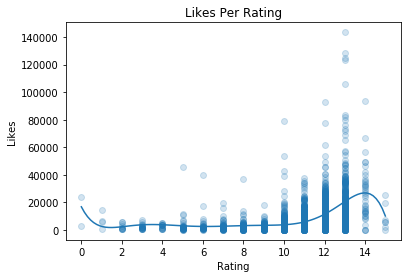

In [51]:
plt.hold(b=True)
plt.scatter(df.rating_numerator, df.favorite_count, alpha = 1/5)
plt.title('Likes Per Rating')
plt.xlabel('Rating')
plt.ylabel('Likes')

x = df.rating_numerator
y = df.favorite_count
idx = np.isfinite(x) & np.isfinite(y)
coefs = np.polyfit(x[idx], y[idx], 7)

x = np.linspace(min(x),max(x),100)
y = coefs[7] + coefs[6]*x  + coefs[5]*(x**2) + coefs[4]*(x**3) + coefs[3]*(x**4) + coefs[2]*(x**5) + coefs[1]*(x**6) + coefs[0]*(x**7) 
plt.plot(x,y)

plt.show()

## Insight 2 - Likes and Retweets

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


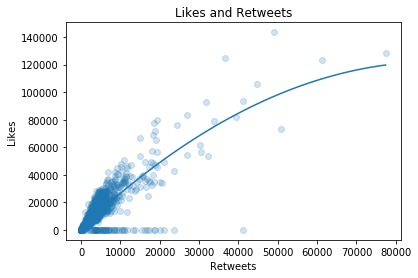

In [52]:
plt.hold(b=True)
plt.scatter(  df.retweet_count, df.favorite_count, alpha = 1/5)
plt.title('Likes and Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

x = df.retweet_count
y = df.favorite_count
idx = np.isfinite(x) & np.isfinite(y)
coefs = np.polyfit(x[idx], y[idx], 2)

x = np.linspace(min(x),max(x),100)
y = coefs[2] + coefs[1]*x  + coefs[0]*(x**2) 
plt.plot(x,y)

plt.show()

## Insight 3 - Retweets and Ratings

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


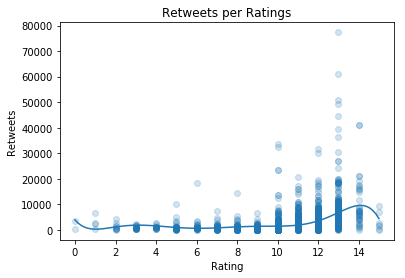

In [53]:
plt.hold(b=True)
plt.scatter(  df.rating_numerator, df.retweet_count, alpha = 1/5)
plt.title('Retweets per Ratings')
plt.xlabel('Rating')
plt.ylabel('Retweets')

x = df.rating_numerator
y = df.retweet_count
idx = np.isfinite(x) & np.isfinite(y)
coefs = np.polyfit(x[idx], y[idx], 7)

x = np.linspace(min(x),max(x),100)
y = coefs[7] + coefs[6]*x  + coefs[5]*(x**2) + coefs[4]*(x**3) + coefs[3]*(x**4) + coefs[2]*(x**5) + coefs[1]*(x**6) + coefs[0]*(x**7) 
plt.plot(x,y)

plt.show()

## Insight 4 - Source and Likes

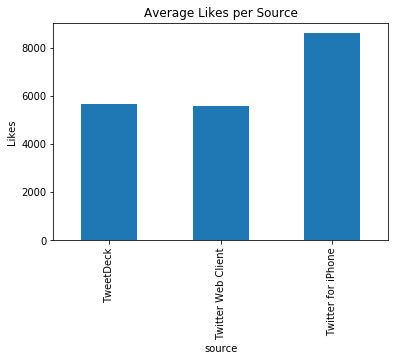

In [54]:
df.groupby(['source'])['favorite_count'].mean().plot.bar()
plt.ylabel('Likes')
plt.title('Average Likes per Source')
plt.show()

## Insight 5 - Likes over Time

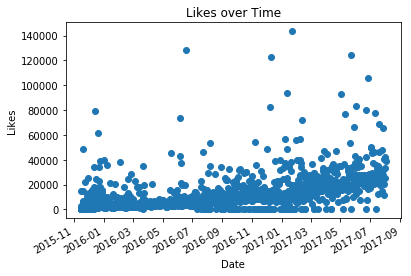

In [55]:
plt.plot_date(df.timestamp, df.favorite_count)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Likes')
plt.title('Likes over Time')
plt.show()